In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import FramePair



Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True)

Output files: /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: False
============Tracklets==================
df_training_tracklets: False
reindexed_masks_training: True
============Traces=====================
red_traces: False
green_traces: False
final_tracks: False
behavior_annotations: True



# Check the tracklets

In [3]:
df_tracklets = project_data.df_all_tracklets

In [4]:
df_tracklets

bodyparts tracklet_0000000                                                   \
coords                   z           x           y likelihood raw_neuron_id   
0                 4.877115  297.774098  424.044846   0.366408           0.0   
1                 4.495950  280.282714  407.775260   0.151632           5.0   
2                 6.018471  272.740668  406.364028   0.431153           1.0   
3                 5.427147  255.625872  396.335380   0.304492           1.0   
4                 5.120417  249.088674  407.942513   0.399028           1.0   
...                    ...         ...         ...        ...           ...   
1494                   NaN         NaN         NaN        NaN           NaN   
1495                   NaN         NaN         NaN        NaN           NaN   
1496                   NaN         NaN         NaN        NaN           NaN   
1497                   NaN         NaN         NaN        NaN           NaN   
1498                   NaN         NaN         NaN        NaN           NaN   

bodyparts                        tracklet_0000001                          \
coords    brightness_red  volume                z           x           y   
0                64019.0  1273.0         4.542084  313.311412  433.153732   
1                65805.0  1532.0         4.130645  298.316611  412.867468   
2                67242.0  1591.0         4.173412  287.559807  406.981428   
3                58790.0  1325.0         4.098089  271.716247  396.642877   
4                63006.0  1383.0         3.630491  264.485370  415.498987   
...                  ...     ...              ...         ...         ...   
1494                 NaN     NaN              NaN         NaN         NaN   
1495                 NaN     NaN              NaN         NaN         NaN   
1496                 NaN     NaN              NaN         NaN         NaN   
1497                 NaN     NaN              NaN         NaN         NaN   
1498                 NaN     NaN              NaN         NaN         NaN   

bodyparts  ... tracklet_0016591                       tracklet_0016592  \
coords     ...    raw_neuron_id brightness_red volume                z   
0          ...              NaN            NaN    NaN              NaN   
1          ...              NaN            NaN    NaN              NaN   
2          ...              NaN            NaN    NaN              NaN   
3          ...              NaN            NaN    NaN              NaN   
4          ...              NaN            NaN    NaN              NaN   
...        ...              ...            ...    ...              ...   
1494       ...            134.0         7293.0  321.0        21.953050   
1495       ...            142.0         7920.0  353.0        21.881410   
1496       ...            133.0         9718.0  423.0        22.034997   
1497       ...            142.0        14260.0  610.0        19.681274   
1498       ...            141.0        16050.0  625.0        19.062731   

bodyparts                                                                  \
coords              x           y likelihood raw_neuron_id brightness_red   
0                 NaN         NaN        NaN           NaN            NaN   
1                 NaN         NaN        NaN           NaN            NaN   
2                 NaN         NaN        NaN           NaN            NaN   
3                 NaN         NaN        NaN           NaN            NaN   
4                 NaN         NaN        NaN           NaN            NaN   
...               ...         ...        ...           ...            ...   
1494       246.370100  434.576126   0.583826         141.0        35612.0   
1495       261.815564  402.035274   0.618481         147.0        38924.0   
1496       266.053027  403.813406   0.211373         148.0        40489.0   
1497       273.951602  407.529012   0.457777          80.0        29712.0   
1498       278.125328  411.366388   0.000000          78.0        29698.0   

bodyp

In [5]:
df_fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/2-training_data/all_tracklets.h5"

df2 = pd.read_hdf(df_fname)

In [6]:
# df2

# Long-range matching

In [7]:
%load_ext autoreload
%autoreload 2
from DLC_for_WBFM.utils.postures.centerline_pca import WormFullVideoPosture, WormReferencePosture
from DLC_for_WBFM.utils.pipeline.tracklet_class import NeuronComposedOfTracklets, TrackedWorm, DetectedTrackletsAndNeurons
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import numpy as np
import pandas as pd
from DLC_for_WBFM.utils.pipeline.matches_class import MatchesWithConfidence
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import calc_FramePair_from_Frames
from tqdm.auto import tqdm
from DLC_for_WBFM.utils.pipeline.matches_class import get_tracklet_name_from_full_name
import importlib
from DLC_for_WBFM.utils.pipeline.matches_class import MatchesAsGraph
import DLC_for_WBFM.utils.pipeline.matches_class as matches_class

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_frames=True)

Output files: /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: False
============Tracklets==================
df_training_tracklets: False
reindexed_masks_training: True
============Traces=====================
red_traces: False
green_traces: False
final_tracks: False
behavior_annotations: True



In [9]:
df_tracklets = project_data.df_all_tracklets
num_frames = project_data.num_frames
all_frames = project_data.raw_frames
all_matches = project_data.raw_matches
raw_clust = project_data.raw_clust

frame_pair_options = all_matches[(0,1)].options

In [10]:
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_K.csv"

full_posture = WormFullVideoPosture(fname)
reference_posture = WormReferencePosture(0, full_posture)

In [11]:

all_long_range_matches = {}
anchor_ind = 0
anchor_frame = all_frames[anchor_ind]
verbose = 2

In [70]:
# Initialize TrackedNeurons at 0, and initialize the TrackedWorm
# Get all tracklets that start at t=0
all_tracklet_names = df_tracklets.columns.get_level_values(0).drop_duplicates()

detections = DetectedTrackletsAndNeurons(df_tracklets, 
                                         project_data.segmentation_metadata,
                                         df_tracklet_matches=raw_clust)
worm_obj = TrackedWorm(detections=detections, verbose=1)

for i, name in enumerate(all_tracklet_names):
    tracklet = df_tracklets[[name]]
    # Assume tracklets are ordered, such that the first tracklet which starts at t>0 mean all the rest do
    if np.isnan(tracklet[name]['z'].iloc[0]):
        break
    new_neuron = worm_obj.initialize_new_neuron()
    new_neuron.add_tracklet(i, 1.0, tracklet, metadata=f"Initial tracklet")

  0%|          | 0/16624 [00:00<?, ?it/s]

In [71]:
worm_obj

Worm with 119 neurons

In [76]:
# Loop over times, and if any TrackedNeuron's have a gap, use the WormReferencePosture to attempt a long-distance match
# Loop over similar postures, not all times
indices_to_check = reference_posture.indices_close_to_reference[1:]
indices_to_check = [i for i in indices_to_check if i < project_data.num_frames]
for i_next_similar_posture in tqdm(indices_to_check):
    
    # Just always loop through all tracks, even if they (theoretically) don't have a gap
    
    # tracks_with_gap = worm_obj.tracks_with_gap_at_or_after_time(i_next_similar_posture)
    # if not tracks_with_gap:
    #     continue
    
    # Then do one volume-volume match to try and continue all ended tracklets
    # i_next_similar_posture = reference_posture.get_next_close_index(t)
    pair_indices = (anchor_ind, i_next_similar_posture)
    long_range_pair = all_long_range_matches.get(pair_indices, None)
    if long_range_pair is None:
        long_range_frame = all_frames[i_next_similar_posture]
        if verbose >= 3:
            print(f"Calculating matches for pair: {pair_indices}")
        long_range_pair = calc_FramePair_from_Frames(frame0=anchor_frame, frame1=long_range_frame, frame_pair_options=frame_pair_options)

        all_long_range_matches[pair_indices] = long_range_pair
    else:
        if verbose >= 3:
            print(f"Reusing matches for pair: {pair_indices}")
    
    # Build convinience class
    long_range_pair.calc_final_matches()
    long_range_matches = MatchesWithConfidence.matches_from_array(np.array(long_range_pair.final_matches))
    mapping_to_long_range = long_range_matches.get_mapping_0_to_1()
    mapping_to_confidence = long_range_matches.get_mapping_pair_to_conf()
    
    tracks_that_are_filled = 0
    for track_name, track in tqdm(worm_obj.global_name_to_neuron.items(), 
                                  total=worm_obj.num_neurons, leave=False):
    # for track_name, track in tracks_with_gap.items():
        
        # From the starting neuron, get the long-range match
        i_starting_neuron = track.neuron_ind
        i_matched_neuron = mapping_to_long_range.get(i_starting_neuron, None)
        if i_matched_neuron is None:
            continue
        conf = mapping_to_confidence[(i_starting_neuron, i_matched_neuron)]
        
        # From the long-range match (including frame information), get the tracklet
        # For now, just accept it
        matched_tracklet_ind, matched_tracklet_name = detections.get_tracklet_from_neuron_and_time(i_matched_neuron, i_next_similar_posture)
        if matched_tracklet_name is None:
            # i.e. there was a neuron match, but it doesn't belong to any tracklet
            continue
        matched_tracklet_df = worm_obj.detections.df_tracklets_zxy[[matched_tracklet_name]]
        track.add_tracklet(matched_tracklet_ind, 
                           confidence=conf, 
                           tracklet=matched_tracklet_df, 
                           metadata=f"Match due to pair {pair_indices}; original name {matched_tracklet_name}")
        
        # TODO: Also record if the matched neurons match the tracklets that didn't end
        tracks_that_are_filled += 1
        
    if verbose >= 3:
        print(f"At time {i_next_similar_posture}, extended {tracks_that_are_filled}/{len(tracks_with_gap)} tracks")
    
    # break
    # if i_next_similar_posture > 50:
    #     break

  0%|          | 0/197 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

In [74]:
len(all_long_range_matches)

197

In [14]:
worm_obj.global_name_to_neuron['neuron_015'].neuron2tracklets.edges

EdgeView([('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000014'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000210'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000429'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000585'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000758'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0001935'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000022'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0002628'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0003442'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0003545'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0003410'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tr

In [15]:
name = 'neuron_053'
worm_obj.global_name_to_neuron[name].neuron2tracklets.edges(data=True)

EdgeDataView([('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0000052', {'metadata': 'Initial tracklet', 'weight': 1.0}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0000038', {'metadata': 'Match due to pair (0, 16); original name tracklet_0000042', 'weight': 0.7020618827980522}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0000580', {'metadata': 'Match due to pair (0, 72); original name tracklet_0000997', 'weight': 0.4707641620933111}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0000466', {'metadata': 'Match due to pair (0, 84); original name tracklet_0000748', 'weight': 0.7684992319577891}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0002851', {'metadata': 'Match due to pair (0, 386); original name tracklet_0004526', 'weight': 0.6980476886726302}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0002666', {'metadata': 

In [16]:
# worm_obj.global_name_to_neuron[name].tracklet_covering_ind

# Build a full graph and do bipartite B-matching (many to one) between global neurons and tracklets

In [77]:
import networkx as nx
from networkx.algorithms import bipartite
from collections import defaultdict

In [78]:
global_tracklet_neuron_graph = nx.compose_all([g.neuron2tracklets for g in worm_obj.global_name_to_neuron.values()])

In [79]:
# Copy the neuron nodes so that this becomes a normal bipartite matching problem, i.e. one-to-one, not many-to-one
neuron_nodes = {n for n, d in global_tracklet_neuron_graph.nodes(data=True) if d["bipartite"] == 0}
tracklet_nodes = {n for n, d in global_tracklet_neuron_graph.nodes(data=True) if d["bipartite"] == 1}
global_tracklet_neuron_graph_with_copies = nx.Graph(global_tracklet_neuron_graph.subgraph(tracklet_nodes))

new_name_to_original_name = dict()

for n in neuron_nodes:
    original_edges = list(global_tracklet_neuron_graph.edges(n, data=True))
    
    for i_copy in range(len(original_edges)):
        # num_copies_already_added = len(original_neuron_to_copy_mapping[n])
        new_name = f"{n}_copy{i_copy}"
        new_name_to_original_name[new_name] = n

        # Add a copy of the node for each edge, which has all the original edges
        new_edges = [[new_name, e[1], e[2]] for e in original_edges]

        global_tracklet_neuron_graph_with_copies.add_edges_from(new_edges)
        # break

In [80]:
# Do normal bipartite matching, such that each tracklet gets a match
tracklet_nodes = {n for n, d in global_tracklet_neuron_graph.nodes(data=True) if d["bipartite"] == 1}
matching_with_copies = nx.bipartite.maximum_matching(global_tracklet_neuron_graph_with_copies, top_nodes=tracklet_nodes)

In [81]:
# Collapse the added copies back to the original neuron, to get a many-to-one matching
final_matching = MatchesWithConfidence()
for name0, name1 in matching_with_copies.items():
    if 'neuron' in name0:
        neuron_copy_name = name0
        tracklet_raw_name = name1
    else:
        tracklet_raw_name = name0
        neuron_copy_name = name1
        
    # Get the names as they are in the graph above
    neuron_raw_name = new_name_to_original_name[neuron_copy_name]
    weight = global_tracklet_neuron_graph[neuron_raw_name][tracklet_raw_name]['weight']
    
    # TODO
    # tracklet_metadata = global_tracklet_neuron_graph[tracklet_raw_name][neuron_raw_name]['metadata']
    
    # Get the final names, as they are in the previous dataframes
    # tracklet_name = get_tracklet_name_from_metadata(tracklet_metadata)
    # neuron_name = get_neuron_name_from_graph_name(neuron_raw_name)
    tracklet_name = global_tracklet_neuron_graph.nodes[tracklet_raw_name]['metadata']
    neuron_name = global_tracklet_neuron_graph.nodes[neuron_raw_name]['metadata']
    
    new_match = [neuron_name, tracklet_name, weight]
    
    final_matching.add_match(new_match)
    

In [82]:
# Finally, make the full dataframe 

# Initialize using the index and column structure of the tracklets
# TODO: Add a column for tracklet ID
num_neurons = final_matching.get_num_matches()
tmp_names = all_tracklet_names[:num_neurons]
df_new = df_tracklets.loc[:, tmp_names].copy()

neuron_names = list(set(final_matching.indices0))
neuron_names.sort()
name_mapper = {t:n for t, n in zip(tmp_names, neuron_names)}
df_new.rename(columns=name_mapper, inplace=True)
df_new[:] = np.nan

max_t = len(df_tracklets)
id_vector = np.zeros(max_t)
# Actually join
for tracklet_name, neuron_name in tqdm(final_matching.get_mapping_1_to_0().items()):
    this_tracklet = df_tracklets[tracklet_name]
    # Preprocess the tracklet dataframe to have an additional column: the id of the tracklet

    nonzero_ind = this_tracklet['z'].notnull()
    tracklet_id = int(tracklet_name.split('_')[-1])
    
    df_new[neuron_name] = df_new[neuron_name].combine_first(this_tracklet)
    try:
        df_new.loc[nonzero_ind, (neuron_name, 'raw_tracklet_id')] = tracklet_id
    except KeyError:
        id_vector[:] = np.nan
        id_vector[nonzero_ind] = tracklet_id
        df_new[neuron_name, 'raw_tracklet_id'] = id_vector
    

  0%|          | 0/4017 [00:00<?, ?it/s]

# Now, save

In [185]:
from DLC_for_WBFM.utils.projects.utils_project import get_sequential_filename

track_config = project_data.project_config.get_tracking_config()

output_df_fname = track_config.config['final_3d_postprocessing']['output_df_fname']
output_df_fname = get_sequential_filename(output_df_fname)
track_config.h5_in_local_project(df_new, output_df_fname, also_save_csv=True)

In [ ]:
# Also save pairwise matches and tracklet-neuron graph

In [186]:
output_df_fname

'3-tracking/postprocessing/combined_3d_tracks.h5'

# Look at matches, particularly some that are wrong

In [83]:
import seaborn as sns

In [191]:
name = 'neuron_001'
track = df_new[name]

track['raw_tracklet_id'] = track['raw_tracklet_id'].astype('category')
opt = dict(data=track, x=track.index, hue='raw_tracklet_id', kind='line', aspect=9)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


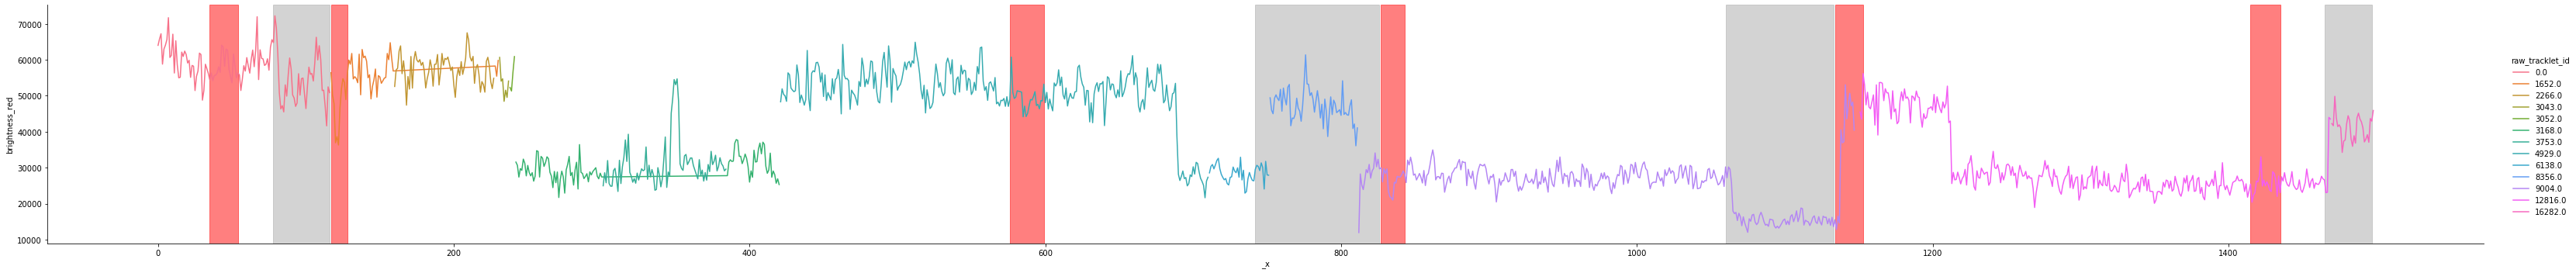

In [192]:
sns.relplot(y='brightness_red', **opt)
project_data.shade_axis_using_behavior()

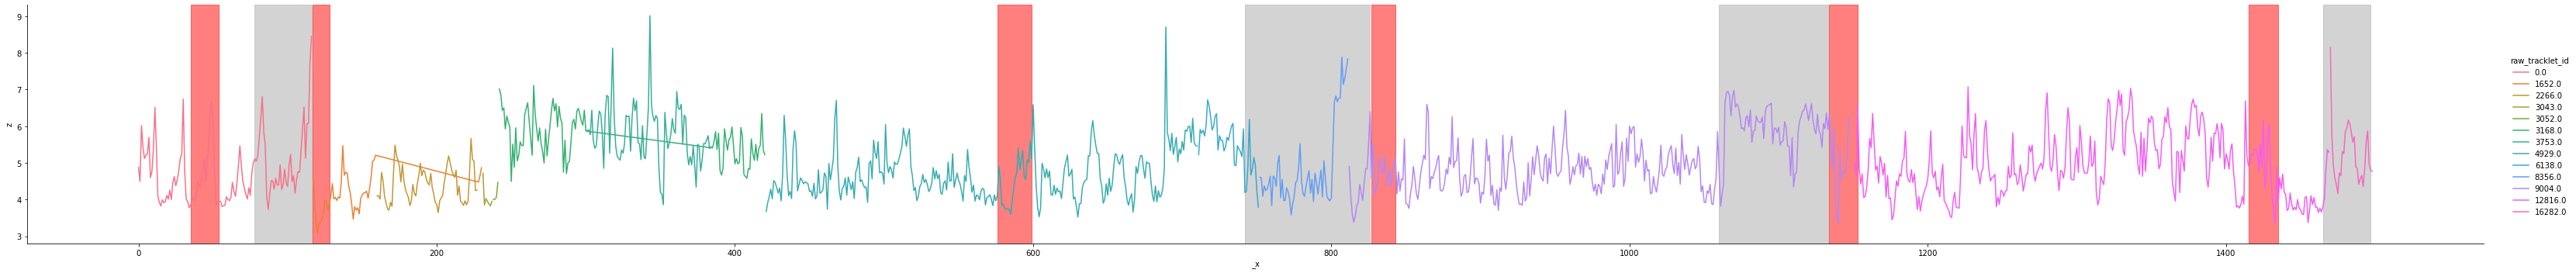

In [193]:
sns.relplot(y='z', **opt)
project_data.shade_axis_using_behavior()

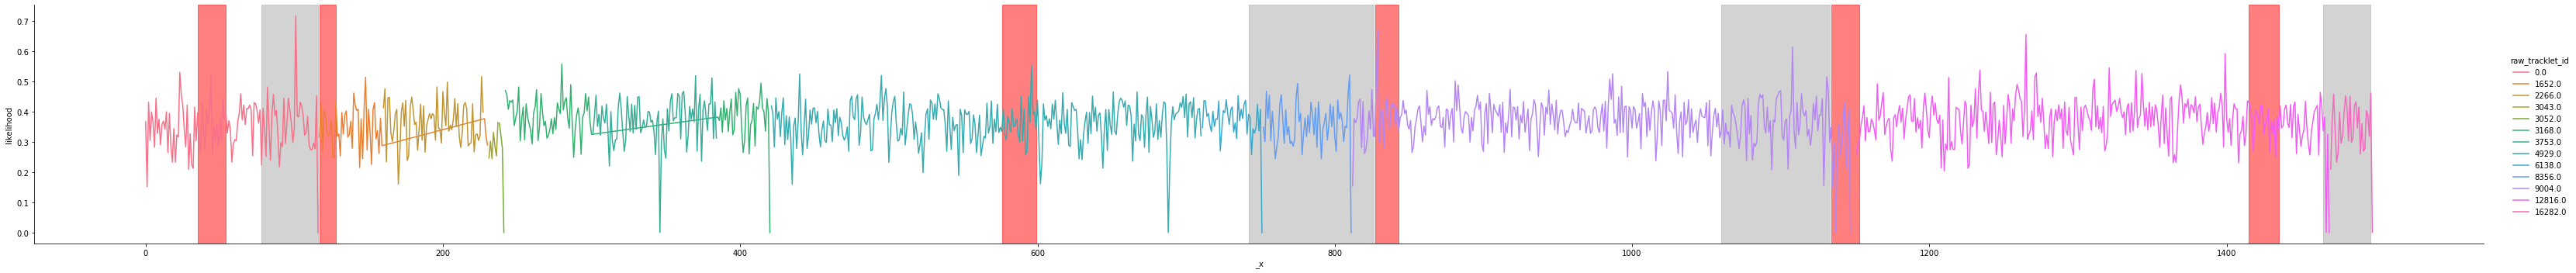

In [194]:
sns.relplot(y='likelihood', **opt)
project_data.shade_axis_using_behavior()

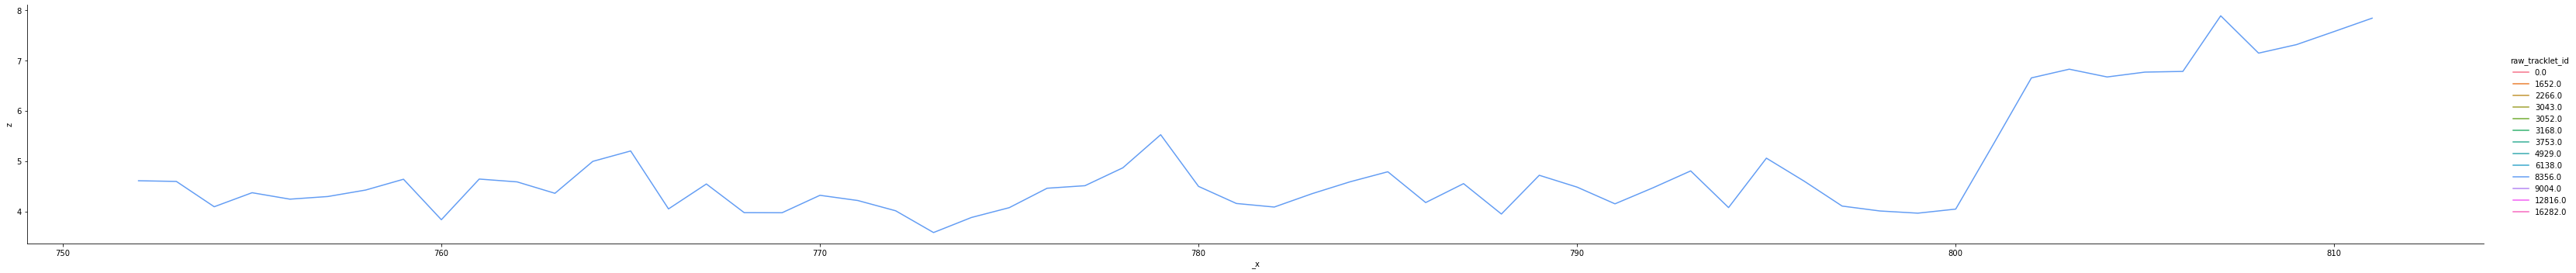

In [177]:
# Get one tracklet with a known jump
sub_track = track[track['raw_tracklet_id']==8356]
opt2 = dict(data=sub_track, x=sub_track.index, hue='raw_tracklet_id', kind='line', aspect=9)

sns.relplot(y='z', **opt2)

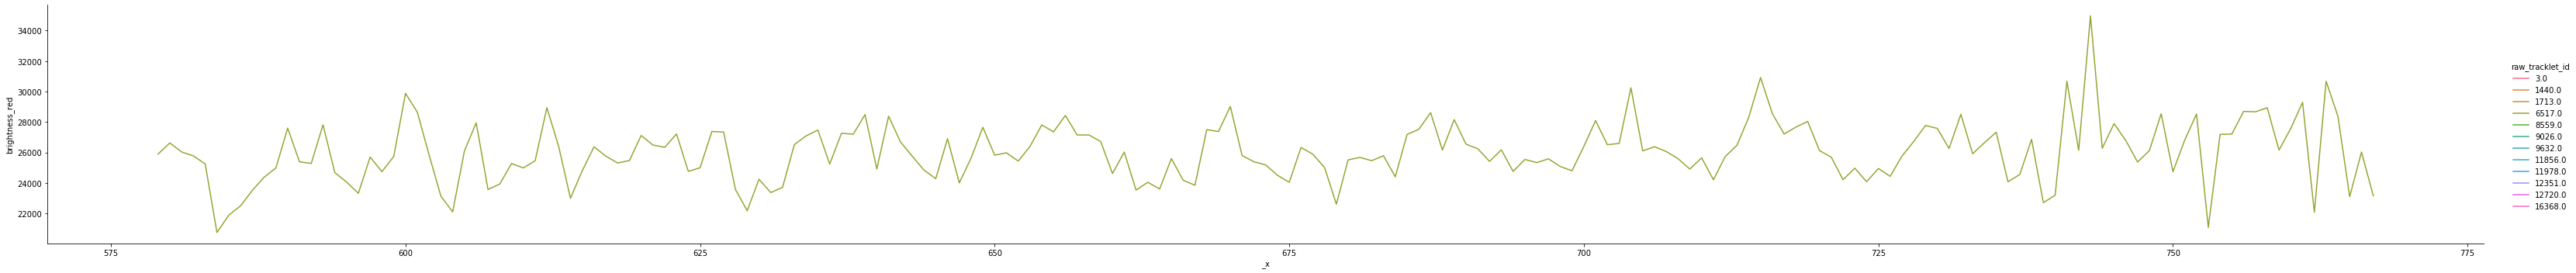

In [167]:
# Get one tracklet with a known jump
sub_track2 = track[track['raw_tracklet_id']==6517]
opt2 = dict(data=sub_track2, x=sub_track2.index, hue='raw_tracklet_id', kind='line', aspect=9)

sns.relplot(y='brightness_red', **opt2)

# Try to split the tracklet

In [166]:
import ruptures as rpt


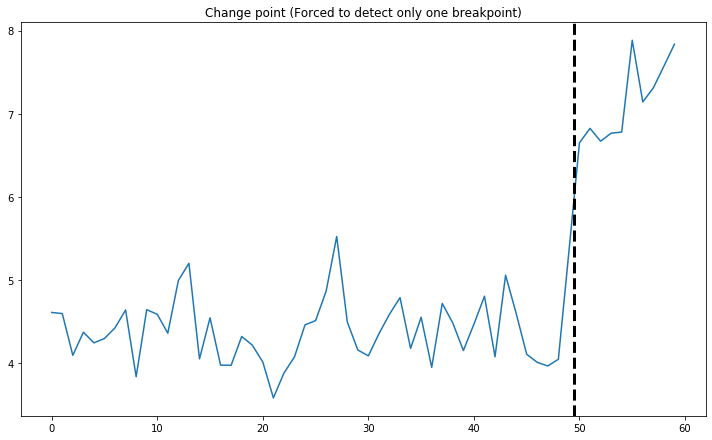

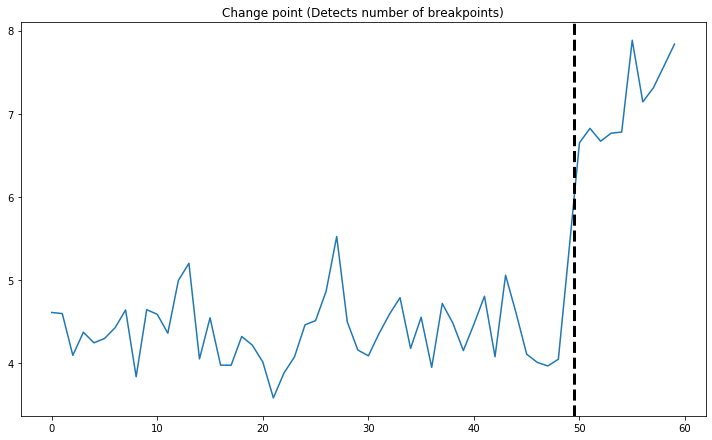

In [182]:
signal = sub_track['z'].to_numpy()
true_bkps = []

model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1)

rpt.show.display(signal, true_bkps, my_bkps, figsize=(10, 6))
plt.title("Change point (Forced to detect only one breakpoint)")
plt.show()

model = "rbf"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Pelt(model=model).fit(signal)
my_bkps = algo.predict(pen=5)

rpt.show.display(signal, true_bkps, my_bkps, figsize=(10, 6))
plt.title("Change point (Detects number of breakpoints)")
plt.show()

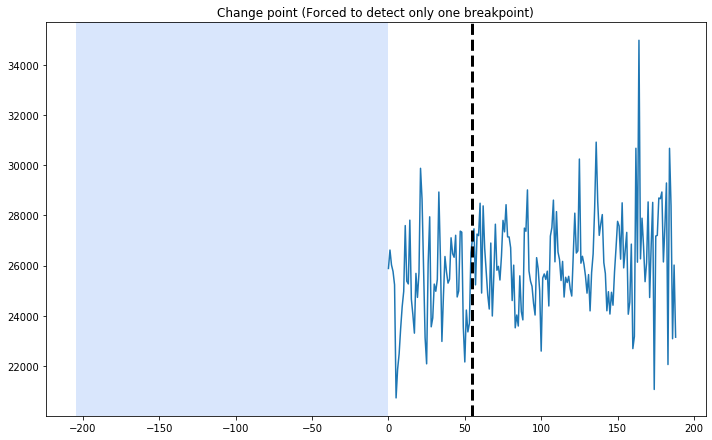

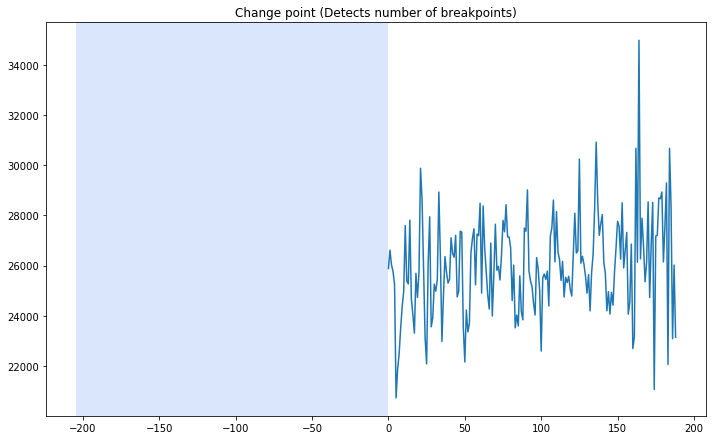

In [171]:
signal = sub_track2['brightness_red'].to_numpy()
true_bkps = [375 - sub_track2.index[0]]


model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1)

rpt.show.display(signal, true_bkps, my_bkps, figsize=(10, 6))
plt.title("Change point (Forced to detect only one breakpoint)")
plt.show()


model = "rbf"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Pelt(model=model).fit(signal)
my_bkps = algo.predict(pen=10)

rpt.show.display(signal, true_bkps, my_bkps, figsize=(10, 6))
plt.title("Change point (Detects number of breakpoints)")
plt.show()

# Scratch

In [ ]:
# # Hacky way to get original tracklet name from metadata...

# def get_tracklet_name_from_metadata(mdat_str):
#     import re

#     regex = r"(?:original name (\w+))"
#     matches = re.finditer(regex, mdat_str, re.MULTILINE)

#     for matchNum, match in enumerate(matches, start=1):

#         # print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))

#         for groupNum in range(0, len(match.groups())):
#             groupNum = groupNum + 1

#             # print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))
#     return match.group(groupNum)

# def get_neuron_name_from_graph_name(neuron_name):
#     return '_'.join(neuron_raw_name.split('_')[-2:])

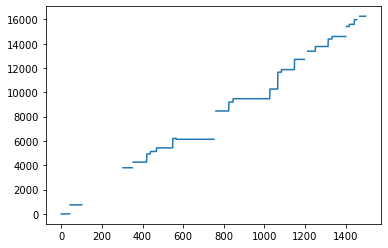

In [24]:
df_new['neuron_005', 'raw_tracklet_id'].plot()

In [25]:
np.isnan(pd.Series(id_vector))

0       False
1       False
2       False
3       False
4       False
        ...  
1494    False
1495    False
1496    False
1497    False
1498    False
Length: 1499, dtype: bool

In [26]:
df_new.loc[nonzero_ind, (neuron_name, 'raw_tracklet_id')]

762    8492.0
763    8492.0
764    8492.0
765    8492.0
766    8492.0
767    8492.0
768    8492.0
769    8492.0
770    8492.0
771    8492.0
772    8492.0
773    8492.0
774    8492.0
775    8492.0
776    8492.0
777    8492.0
Name: (neuron_092, raw_tracklet_id), dtype: float64

In [27]:
max_t = len(df_tracklets)
id_vector = np.zeros(max_t)
id_vector[:] = np.nan
nonzero_ind = df_tracklets['tracklet_0000001']['z'].notnull()
id_vector[nonzero_ind] = 1

df_tracklets['tracklet_0000001', 'raw_tracklet_id'] = id_vector
df_tracklets['tracklet_0000001', 'raw_tracklet_id']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1494    NaN
1495    NaN
1496    NaN
1497    NaN
1498    NaN
Name: (tracklet_0000001, raw_tracklet_id), Length: 1499, dtype: float64

In [28]:
nonzero_ind

0        True
1        True
2        True
3        True
4        True
        ...  
1494    False
1495    False
1496    False
1497    False
1498    False
Name: z, Length: 1499, dtype: bool

In [29]:
df_tracklets[]

SyntaxError: invalid syntax (4077487068.py, line 1)

In [ ]:
matches = re.finditer(regex, mdat, re.MULTILINE)

list(matches)

In [ ]:
mdat = global_tracklet_neuron_graph[neuron_raw_name][tracklet_name]['metadata']